In [1]:
"""
Created on Fri Oct 30 2020
@author: Nicole Albern

Plot vertical profiles of cloud heating rates for each
cloud class.
"""

import matplotlib.pyplot as plt
#import matplotlib as mpl
import numpy as np
import xarray as xr

#import shutil
#import zarr

import sys
sys.path.append('/pf/b/b380490/jupyter_notebooks/nawdex_hackathon')
import dict_nawdexsims

simdict = dict_nawdexsims.simdictionary()
colordict = dict_nawdexsims.colordictionary()

#import dask
#from dask.distributed import Client
#client = Client()
#client

ModuleNotFoundError: No module named 'dict_nawdexsims'

In [ ]:
# get height at full levels
def get_fulllevel_height():
    # define simulation
    resolution = '80km'
    sim = '0001'
    expid = 'nawdexnwp-' + resolution + '-mis-' + sim

    # read ocean mask
    ipath_oceanmask = '/work/bb1018/nawdex-hackathon_pp/'
    da_ocean = xr.open_dataset(ipath_oceanmask + '/openoceanmask/' + expid + \
                               '_openoceanmask.nc')['mask_openocean']
    index = np.where(da_ocean == 1)[0]
    del da_ocean, ipath_oceanmask

    # read z_ifc data
    ipath = '/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/' + \
            'nawdexnwp-' + resolution + '-mis-' + sim + '/'
    ds = xr.open_dataset(ipath + 'nawdexnwp-' + resolution + '-mis-' + \
                         sim + '_2016092200_fg_DOM01_ML_0036.nc')
    del ipath

    # apply ocean mask on z_ifc to make sure to look at ocean grid point
    ds = ds.isel(ncells=index)

    # calculate full levels based on z_ifc
    z_full = (ds.z_ifc[:,0] - (ds.z_ifc[:,0].diff('height_3')/2)).values

    #print(z_full)

    del resolution, sim, expid, index, ds
    
    return z_full

zfull = get_fulllevel_height()

#print(zfull)

In [8]:
# thresholds for cloud classes
# 'hq62_mq67_lq30', 'hq60_mq60_lq25', 'hq65_mq70_lq35'
threshold = 'hq62_mq67_lq30'

#ipath = '/scratch/b/b380490/hackathon/'
ipath = '/work/bb1018/nawdex-hackathon_pp/cloudclasses/' + \
        'cloudheating_for_cloudclass/' + threshold + '/'
opath = '/pf/b/b380490/jupyter_notebook_output/nawdex_hackathon/'

# simulation setups
resolutions = ['80km', '40km', '20km', '10km', '5km', '2km', '2km-shcon']
mphysics = [1, 2]
#conv = 1

# cloud classes
ncclass = 8 # number of cloud classes
cclasses = ['High (H)', 'Middle (M)', 'Low (L)',
            'H-M', 'M-L', 'H-L', 'H-M-L', 'clear sky']
cclass_save = ['H', 'M', 'L', 'H-M', 'M-L', 'H-L', 'H-M-L', 'clearsky']

['nawdexnwp-80km-mis-0001', 'nawdexnwp-80km-mis-0003', 'nawdexnwp-80km-mis-0005', 'nawdexnwp-80km-mis-0007', 'nawdexnwp-80km-mis-0009']
['nawdexnwp-40km-mis-0001', 'nawdexnwp-40km-mis-0003', 'nawdexnwp-40km-mis-0005', 'nawdexnwp-40km-mis-0007', 'nawdexnwp-40km-mis-0009']
['nawdexnwp-20km-mis-0001', 'nawdexnwp-20km-mis-0003', 'nawdexnwp-20km-mis-0005', 'nawdexnwp-20km-mis-0007', 'nawdexnwp-20km-mis-0009']
['nawdexnwp-10km-mis-0001', 'nawdexnwp-10km-mis-0005', 'nawdexnwp-10km-mis-0007', 'nawdexnwp-10km-mis-0009', 'nawdexnwp-10km-mis-0011']
['nawdexnwp-5km-mis-0001', 'nawdexnwp-5km-mis-0005', 'nawdexnwp-5km-mis-0007', 'nawdexnwp-5km-mis-0009', 'nawdexnwp-5km-mis-0011']
['nawdexnwp-2km-mis-0001', 'nawdexnwp-2km-mis-0005', 'nawdexnwp-2km-mis-0007', 'nawdexnwp-2km-mis-0009', 'nawdexnwp-2km-mis-0011']
['nawdexnwp-2km-mis-0001-shcon', 'nawdexnwp-2km-mis-0005-shcon', 'nawdexnwp-2km-mis-0007-shcon', 'nawdexnwp-2km-mis-0009-shcon', 'nawdexnwp-2km-mis-0011-shcon']


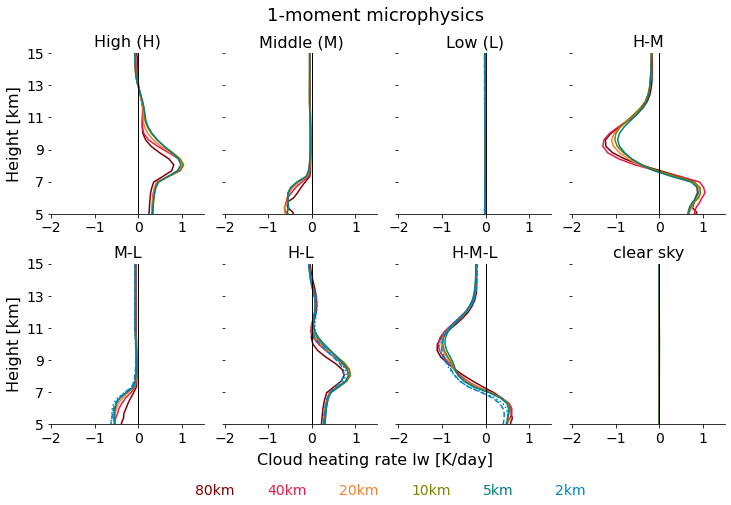

['nawdexnwp-80km-mis-0002', 'nawdexnwp-80km-mis-0004', 'nawdexnwp-80km-mis-0006', 'nawdexnwp-80km-mis-0008', 'nawdexnwp-80km-mis-0010']
['nawdexnwp-40km-mis-0002', 'nawdexnwp-40km-mis-0004', 'nawdexnwp-40km-mis-0006', 'nawdexnwp-40km-mis-0008', 'nawdexnwp-40km-mis-0010']
['nawdexnwp-20km-mis-0002', 'nawdexnwp-20km-mis-0004', 'nawdexnwp-20km-mis-0006', 'nawdexnwp-20km-mis-0008', 'nawdexnwp-20km-mis-0010']
['nawdexnwp-10km-mis-0002', 'nawdexnwp-10km-mis-0006', 'nawdexnwp-10km-mis-0008', 'nawdexnwp-10km-mis-0010', 'nawdexnwp-10km-mis-0012']
['nawdexnwp-5km-mis-0002', 'nawdexnwp-5km-mis-0006', 'nawdexnwp-5km-mis-0008', 'nawdexnwp-5km-mis-0010', 'nawdexnwp-5km-mis-0012']
['nawdexnwp-2km-mis-0002', 'nawdexnwp-2km-mis-0006', 'nawdexnwp-2km-mis-0008', 'nawdexnwp-2km-mis-0010', 'nawdexnwp-2km-mis-0012']
['nawdexnwp-2km-mis-0002-shcon', 'nawdexnwp-2km-mis-0006-shcon', 'nawdexnwp-2km-mis-0008-shcon', 'nawdexnwp-2km-mis-0010-shcon', 'nawdexnwp-2km-mis-0012-shcon']


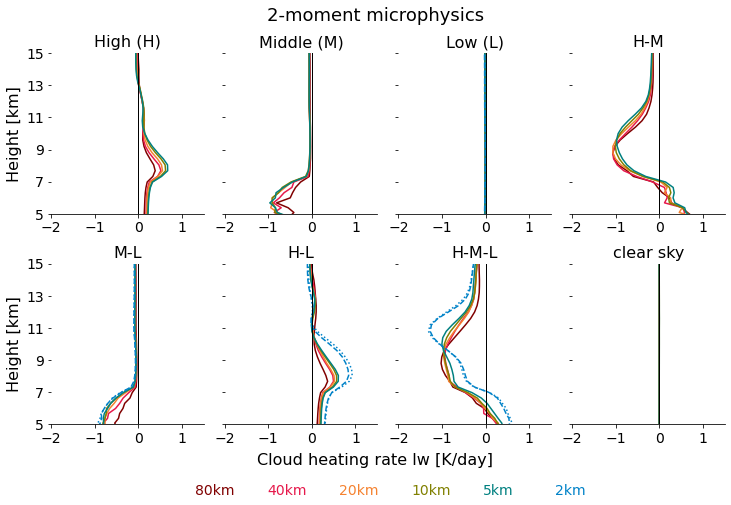

In [20]:
##############################################################################

var = 'chr_lw'
#var = 'chr_sw'

# plot
for mphys in mphysics:
    # open figure, add lines with each iteration over the resolutions
    # and cloud classes
    fig, ax = plt.subplots(2, 4, figsize=(10, 6), sharey=True)
    ax = ax.reshape(-1)
    
    for res in resolutions:
        if res in ['80km', '40km', '20km', '10km', '5km']:
            conv = 1
            lstyle='-'
        elif res == '2km':
            conv = 0
            lstyle = '--'
        elif res == '2km-shcon':
            conv = 2
            lstyle = ':'
            res = '2km'

        # get all expids for simulations with same configuration
        expids = [key for key in simdict if simdict[key]['res'] == res and \
                                            simdict[key]['conv'] == conv and \
                                            simdict[key]['mphys'] == mphys]
        print(expids)
        
        # read cloud heating rates from all simulations that have the same
        # configuration
        data = []
        for expid in expids:
            ds_chr = xr.open_dataset(ipath + expid + \
                                     '_cloudheatingrate_cloudclasses_' + \
                                     'areamean_timemean_oceanmask_applied_' + \
                                     threshold + '.nc')
            data.append(ds_chr)
            del ds_chr
        
        # merge data with same configuration and get mean over simulations
        ds = xr.concat([x for x in data], 'nsim')
        ds = ds.mean('nsim')
        
        #print(ds)
        
        del data, expid
        
        # plot cloud cover for different cloud classes
        for c in range(ncclass):
            ax[c].plot(ds[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                       color=colordict[res], linestyle=lstyle, label=res)
            ax[c].tick_params(labelsize=14)
            ax[c].spines['right'].set_color('none')
            ax[c].spines['top'].set_color('none')
            ax[c].spines['left'].set_color('none')
            #ax[c].spines['left'].set_position('zero')
            ax[c].axvline(0, linewidth=1, color='k')
            ax[c].set_yticks(np.arange(5, 31, 2))
            ax[c].set_ylim(5, 15)#(0, 30)
            if 'sw' in var:
                ax[c].set_xticks(np.arange(-2, 3.5, 0.2))
                ax[c].set_xlim(-0.2, 0.55)
            elif 'lw' in var:
                ax[c].set_xticks(np.arange(-2, 3.5, 1))
                ax[c].set_xlim(-2, 1.5)
            ax[c].set_title(cclasses[c], fontsize=16)
        del c

        del ds
    del res

    fig.tight_layout()
    
    # legend: text for lines
    #xloc = [0.18, 0.41, 0.55, 0.18, 0.41, 0.55, 0.7]
    xloc = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75]
    for r, res in enumerate(resolutions[:-1]):
        fig.text(xloc[r], -0.08, resolutions[r], color=colordict[res],
                 ha='left', va='center', rotation='horizontal', fontsize=14,
                 backgroundcolor='white')
    del r, res, xloc

    #leg = ax[.legend(ncol=1, prop={'size':15})
    ##leg.get_frame().set_linewidth(0.0)
    ##del leg

    ax[0].set_ylabel('Height [km]', fontsize=16)
    ax[4].set_ylabel('Height [km]', fontsize=16)
    #fig.text(-0.02, 0.5, 'Height [km]', rotation='vertical',
    #         ha='center', va='center', fontsize=16)
    fig.text(0.5, -0.01, 'Cloud heating rate ' + var[-2:] + ' [K/day]',
              rotation='horizontal', ha='center', va='center', fontsize=16)

    plt.suptitle(str(mphys) + '-moment microphysics', fontsize=18, y=1.04)

    #fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + '_cloudclasses_mphys' + str(mphys) + '.pdf',
    #            bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    del fig, ax

del mphys


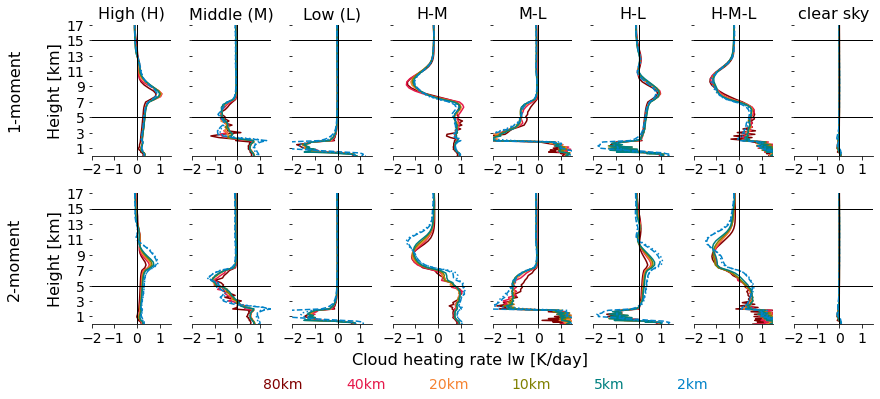

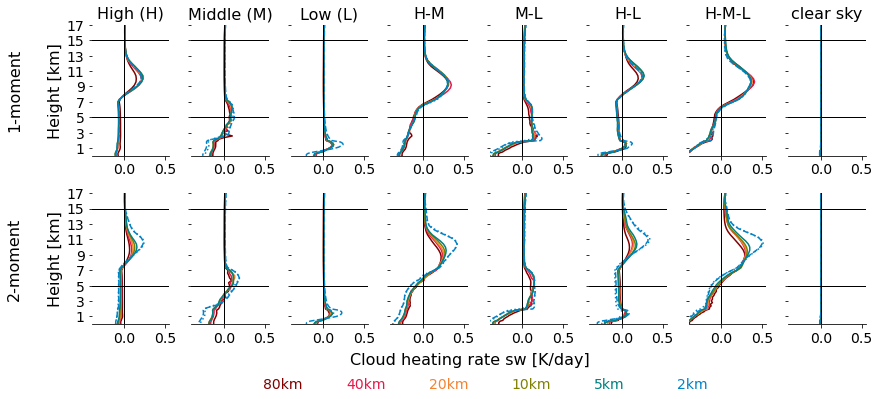

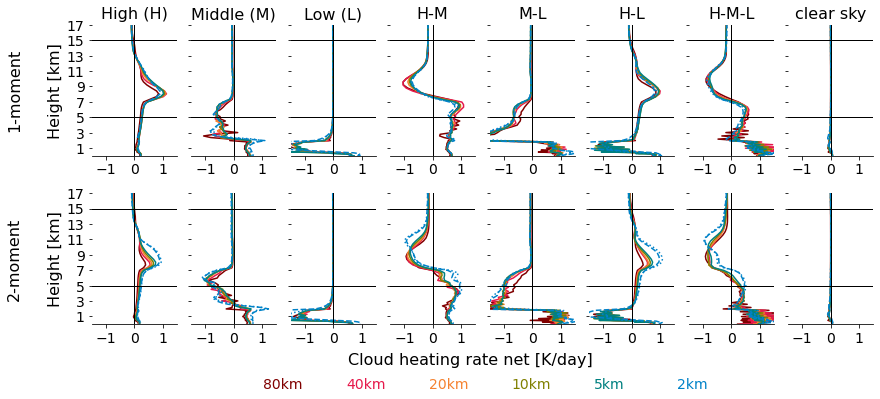

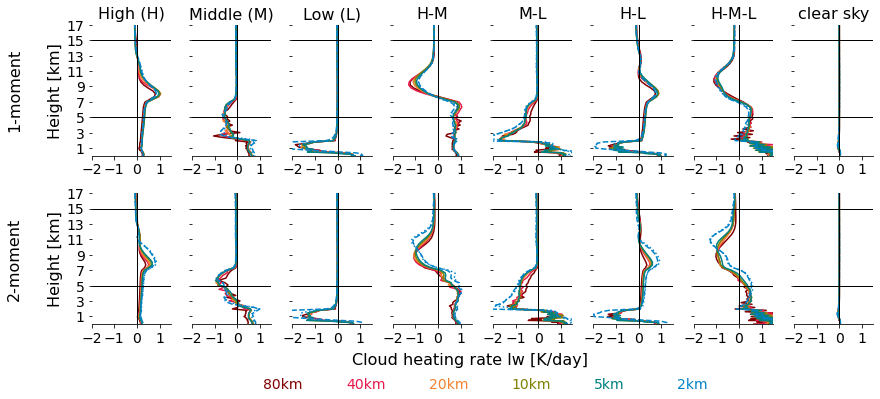

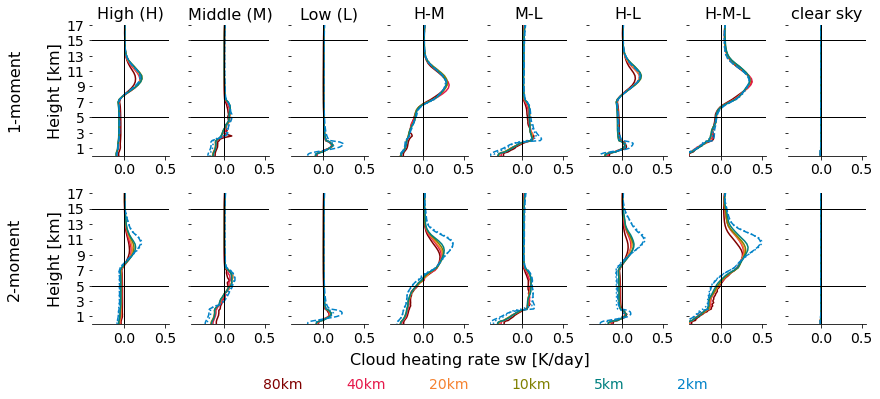

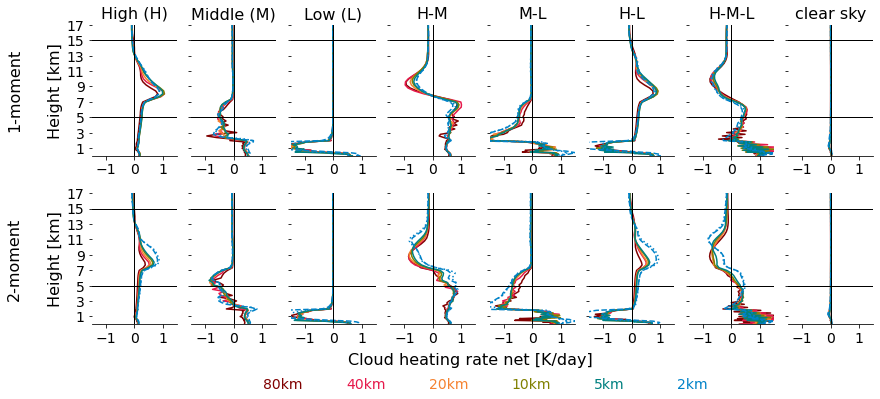

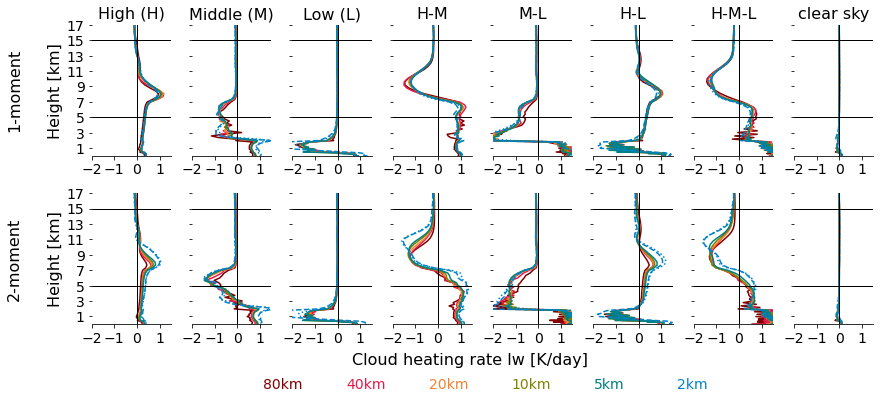

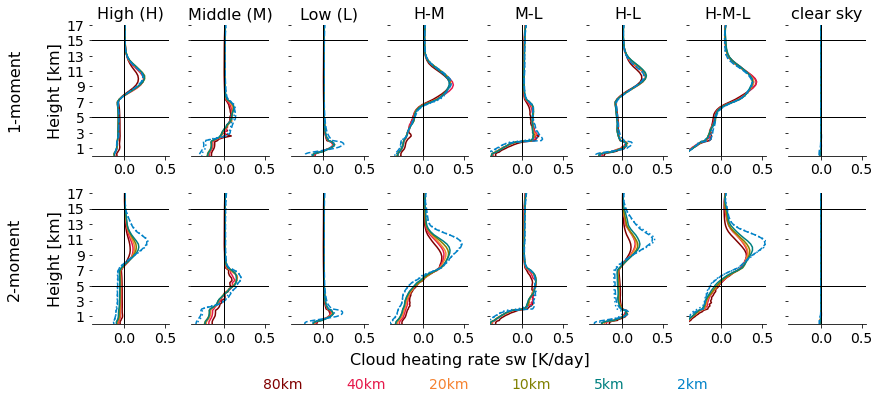

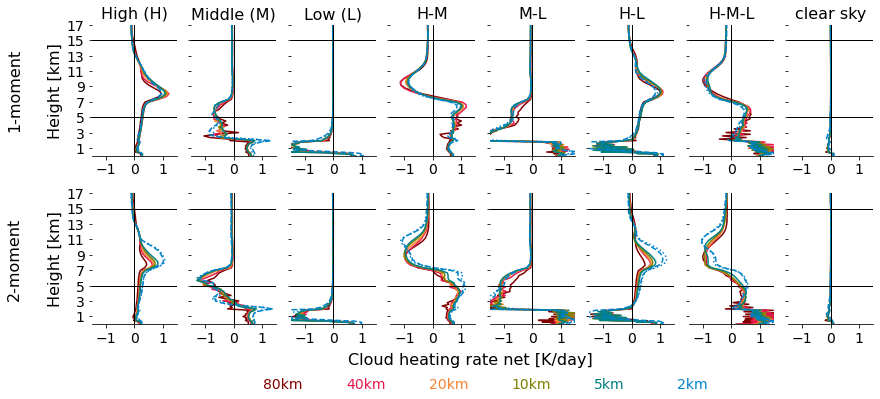

In [15]:
# Overview plots
# all classes, all heights, both microphysics schemes in one figure
varlist = ['chr_lw', 'chr_sw', 'chr_net']

for threshold in ['hq62_mq67_lq30', 'hq60_mq60_lq25', 'hq65_mq70_lq35']:
    ipath = '/work/bb1018/nawdex-hackathon_pp/cloudclasses/' + \
            'cloudheating_for_cloudclass/' + threshold + '/'
    for var in varlist:
        # open figure, add lines with each iteration over the resolutions
        # and cloud classes
        fig, ax = plt.subplots(2, 8, figsize=(11.5, 5), sharey=True)
        for mphys in mphysics:
            for res in resolutions:
                if res in ['80km', '40km', '20km', '10km', '5km']:
                    conv = 1
                    lstyle='-'
                elif res == '2km':
                    conv = 0
                    lstyle = '--'
                elif res == '2km-shcon':
                    conv = 2
                    lstyle = ':'
                    res = '2km'

                # get all expids for simulations with same configuration
                expids = [key for key in simdict if simdict[key]['res'] == res and \
                                                    simdict[key]['conv'] == conv and \
                                                    simdict[key]['mphys'] == mphys]
                #print(expids)

                # read cloud cover from all simulations that have the same
                # configuration
                data = []
                for expid in expids:
                    if var == 'chr_net':
                        ds = xr.open_dataset(ipath + expid + \
                                             '_cloudheatingrate_cloudclasses_' + \
                                             'areamean_timemean_oceanmask_applied_' + \
                                             threshold + '.nc')
                        for c in range(1, ncclass+1):
                            da = ds['chr_lw_cclass' + str(c)] + ds['chr_sw_cclass' + str(c)]
                            da.name = "chr_net_cclass" + str(c)
                            if c == 1:
                                ds_chr = da.to_dataset()
                            else:
                                ds_chr = ds_chr.update(da.to_dataset())
                            del da
                        del c
                    else:
                        ds_chr = xr.open_dataset(ipath + expid + \
                                                 '_cloudheatingrate_cloudclasses_' + \
                                                 'areamean_timemean_oceanmask_applied_' + \
                                                 threshold + '.nc')
                    data.append(ds_chr)
                    del ds_chr

                # merge data with same configuration and get mean over simulations
                ds = xr.concat([x for x in data], 'nsim')
                ds = ds.mean('nsim')

                #print(ds)

                del data, expid

                # plot cloud cover for different cloud classes
                for c in range(ncclass):
                    ax[mphys-1, c].plot(ds[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                                        color=colordict[res], linestyle=lstyle, label=res)
                    ax[mphys-1, c].tick_params(labelsize=14)
                    ax[mphys-1, c].spines['right'].set_color('none')
                    ax[mphys-1, c].spines['top'].set_color('none')
                    ax[mphys-1, c].spines['left'].set_color('none')
                    #ax[mphys-1, c].spines['left'].set_position('zero')
                    ax[mphys-1, c].axvline(0, linewidth=1, color='k')
                    ax[mphys-1, c].set_yticks(np.arange(1, 31, 2))
                    ax[mphys-1, c].set_ylim(5, 15)# (5, 15)#(0, 17)
                    if ax[mphys-1, c].get_ylim() == (0.0, 17.0):
                        ax[mphys-1, c].axhline(5, linewidth=1, color='k')
                        ax[mphys-1, c].axhline(15, linewidth=1, color='k')
                    if 'sw' in var:
                        # for 5-15 km:
                        if ax[mphys-1, c].get_ylim() == (5.0, 15.0):
                            ax[mphys-1, c].set_xlim(-0.2, 0.55)
                        # for 0-17 km:
                        elif ax[mphys-1, c].get_ylim() == (0.0, 17.0):
                            ax[mphys-1, c].set_xlim(-0.4, 0.55)
                    elif 'lw' in var:
                        ax[mphys-1, c].set_xticks(np.arange(-2, 3.5, 1))
                        ax[mphys-1, c].set_xlim(-2, 1.5)
                    elif 'net' in var:
                        ax[mphys-1, c].set_xticks(np.arange(-2, 3.5, 1))
                        ax[mphys-1, c].set_xlim(-1.5, 1.5)
                    ax[0, c].set_title(cclasses[c], fontsize=16)
                del c
                del ds
            del res

        fig.tight_layout()

        # legend: text for lines
        #xloc = [0.18, 0.41, 0.55, 0.18, 0.41, 0.55, 0.7]
        xloc = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75]
        for r, res in enumerate(resolutions[:-1]):
            fig.text(xloc[r], -0.08, resolutions[r], color=colordict[res],
                     ha='left', va='center', rotation='horizontal', fontsize=14,
                     backgroundcolor='white')
        del r, res, xloc

        #leg = ax[.legend(ncol=1, prop={'size':15})
        ##leg.get_frame().set_linewidth(0.0)
        ##del leg

        ax[0, 0].set_ylabel('Height [km]', fontsize=16)
        ax[1, 0].set_ylabel('Height [km]', fontsize=16)
        #fig.text(-0.02, 0.5, 'Height [km]', rotation='vertical',
        #         ha='center', va='center', fontsize=16)
        if 'net' in var:
            fig.text(0.5, -0.01, 'Cloud heating rate ' + var[-3:] + ' [K/day]',
                     rotation='horizontal', ha='center', va='center', fontsize=16)
        else:
            fig.text(0.5, -0.01, 'Cloud heating rate ' + var[-2:] + ' [K/day]',
                     rotation='horizontal', ha='center', va='center', fontsize=16)
        fig.text(-0.05, 0.74, '1-moment',
                 rotation='vertical', ha='center', va='center', fontsize=16)
        fig.text(-0.05, 0.27, '2-moment',
                 rotation='vertical', ha='center', va='center', fontsize=16)
        #if var in ['chr_lw', 'chr_sw']:
        #    if ax[0, 0].get_ylim() == (5.0, 15.0):
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + \
        #                    '_cloudclasses_overview_' + threshold + '_5-15km.png', dpi=400, #pdf',
        #                    bbox_inches='tight')
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + \
        #                    '_cloudclasses_overview_' + threshold + '_5-15km.pdf',
        #                    bbox_inches='tight')
        #    elif ax[0, 0].get_ylim() == (0.0, 17.0):
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + \
        #                    '_cloudclasses_overview_' + threshold + '_0-17km.png', dpi=400, #pdf',
        #                    bbox_inches='tight')
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + \
        #                    '_cloudclasses_overview_' + threshold + '_0-17km.pdf',
        #                    bbox_inches='tight')
        #else:
        #    if ax[0, 0].get_ylim() == (5.0, 15.0):
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-3:] + \
        #                    '_cloudclasses_overview_' + threshold + '_5-15km.png', dpi=400, #pdf',
        #                    bbox_inches='tight')
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-3:] + \
        #                    '_cloudclasses_overview_' + threshold + '_5-15km.pdf',
        #                    bbox_inches='tight')
        #    elif ax[0, 0].get_ylim() == (0.0, 17.0):
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-3:] + \
        #                    '_cloudclasses_overview_' + threshold + '_0-17km.png', dpi=400, #pdf',
        #                    bbox_inches='tight')
        #        fig.savefig(opath + 'cloudheatingrate_profile_' + var[-3:] + \
        #                    '_cloudclasses_overview_' + threshold + '_0-17km.pdf',
        #                    bbox_inches='tight')
        plt.show(fig)
        plt.close(fig)
        del mphys
        del fig, ax
    del var#, varlist
del threshold
del varlist

['nawdexnwp-80km-mis-0001', 'nawdexnwp-80km-mis-0003', 'nawdexnwp-80km-mis-0005', 'nawdexnwp-80km-mis-0007', 'nawdexnwp-80km-mis-0009']


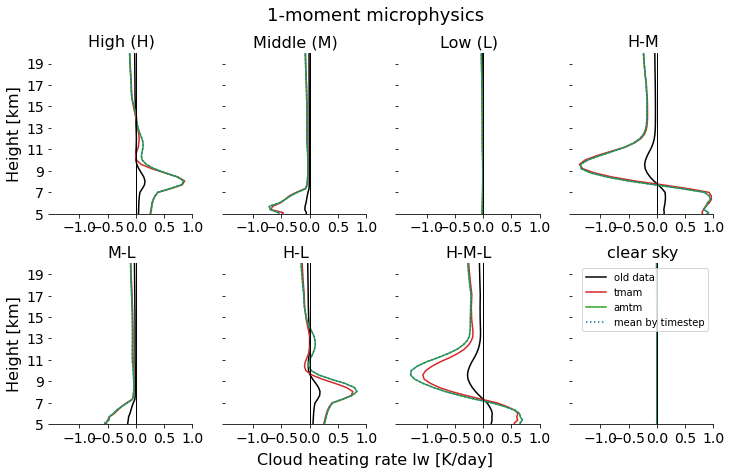

['nawdexnwp-80km-mis-0002', 'nawdexnwp-80km-mis-0004', 'nawdexnwp-80km-mis-0006', 'nawdexnwp-80km-mis-0008', 'nawdexnwp-80km-mis-0010']


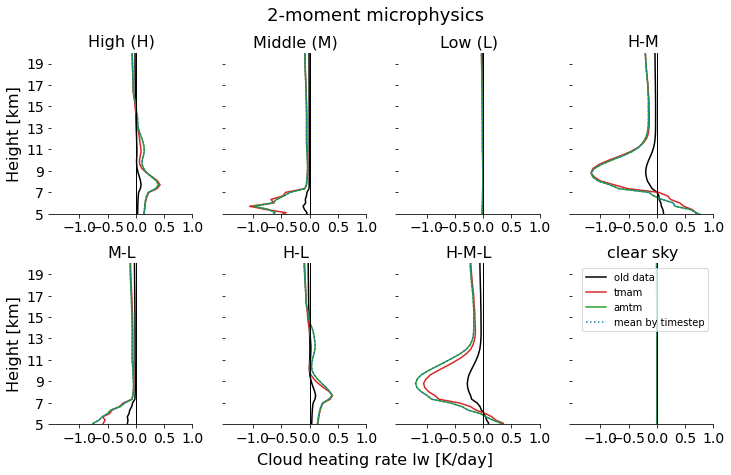

In [34]:
#ipath = '/scratch/b/b380490/hackathon/'
#
#sims = ['0001', '0002', '0003', '0004', '0005',
#        '0006', '0007', '0008', '0009', '0010']
#for sim in sims:
#    print(sim)
#    ds1 = xr.open_dataset(ipath + 'nawdexnwp-80km-mis-' + sim + '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied.nc')
#    ds2 = xr.open_dataset(ipath + 'test_27Jan/' + 'nawdexnwp-80km-mis-' + sim + '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied.nc')#
#
#    for var, data in ds1.data_vars.items():
#        print(var, ((ds1[var] - ds2[var])*86400).values.min(), ((ds1[var] - ds2[var])*86400).values.max())
#    del var, data
#    del ds1, ds2
#del sim
#del ipath, sims



##############################################################################
ipath = '/scratch/b/b380490/hackathon/'
opath = '/scratch/b/b380490/hackathon/'

# simulation setups
resolutions = ['80km']#, '40km', '20km', '10km']#, '5km']#, '2km']
#resolutions = ['2km']
mphysics = [1, 2]
#conv = 1

# cloud classes
ncclass = 8 # number of cloud classes
cclasses = ['High (H)', 'Middle (M)', 'Low (L)',
            'H-M', 'M-L', 'H-L', 'H-M-L', 'clear sky']
cclass_save = ['H', 'M', 'L', 'H-M', 'M-L', 'H-L', 'H-M-L', 'clearsky']


var = 'chr_lw'
#var = 'chr_sw'

# plot
for mphys in mphysics:
    # open figure, add lines with each iteration over the resolutions
    # and cloud classes
    fig, ax = plt.subplots(2, 4, figsize=(10, 6), sharey=True)
    ax = ax.reshape(-1)
    
    for res in resolutions:
        if res in ['80km', '40km', '20km', '10km', '5km']:
            conv = 1
            lstyle='-'
        elif res == '2km':
            conv = 0
            lstyle = '--'
        elif res == '2km-shcon':
            conv = 2
            lstyle = ':'

        # get all expids for simulations with same configuration
        expids = [key for key in simdict if simdict[key]['res'] == res and \
                                            simdict[key]['conv'] == conv and \
                                            simdict[key]['mphys'] == mphys]
        print(expids)
        
        # read cloud cover from all simulations that have the same
        # configuration
        dataold = []
        datanew = []
        data_amtm = []
        data_tmam = []
        for expid in expids:
            ds_chr_old = xr.open_dataset(ipath + 'test_27Jan/' + expid + \
                                        '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied.nc')
            dataold.append(ds_chr_old)
            
            ds_chr_new = xr.open_dataset(ipath + expid + \
                                        '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied.nc')
            datanew.append(ds_chr_new)
            
            ds_chramtm = xr.open_dataset(ipath + expid + \
                                        '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied_amtm.nc')
            data_amtm.append(ds_chramtm)
            
            ds_chrtmam = xr.open_dataset(ipath + expid + \
                                        '_cloudheatingrate_cloudclasses_timemean_areamean_oceanmask_applied_tmam.nc')
            data_tmam.append(ds_chrtmam)
            
            #print(da_ccover.clc_cclass1.min(), da_ccover._clc_cclass1.max())
            del ds_chr_old, ds_chr_new, ds_chramtm, ds_chrtmam
        
        # merge data with same configuration and get mean over simulations
        dsold = xr.concat([x for x in dataold], 'nsim')
        dsold = dsold.mean('nsim')
        
        dsnew = xr.concat([x for x in datanew], 'nsim')
        dsnew = dsnew.mean('nsim')
        
        ds_amtm = xr.concat([x for x in data_amtm], 'nsim')
        ds_amtm = ds_amtm.mean('nsim')
        
        ds_tmam = xr.concat([x for x in data_tmam], 'nsim')
        ds_tmam = ds_tmam.mean('nsim')
        
        #print(ds)
        
        del dataold, datanew, data_amtm, data_tmam, expid
        
        # plot cloud cover for different cloud classes
        for c in range(ncclass):
            ax[c].plot(dsold[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                       color='k', linestyle=lstyle, label='old data')
            
            ax[c].plot(ds_tmam[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                       color='tab:red', label='tmam')#colordict[res], linestyle=':', label=res)
            ax[c].plot(ds_amtm[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                       color='tab:green', label='amtm')#colordict[res], linestyle=':', label=res)
            
            ax[c].plot(dsnew[var + '_cclass' + str(c+1)]*86400, zfull/1000,
                       color='tab:blue', linestyle=':', label='mean by timestep')
            ax[c].tick_params(labelsize=14)
            ax[c].spines['right'].set_color('none')
            ax[c].spines['top'].set_color('none')
            ax[c].spines['left'].set_color('none')
            #ax[c].spines['left'].set_position('zero')
            ax[c].set_yticks(np.arange(5, 31, 2))
            ax[c].set_ylim(5,20)#(5, 15)#(0, 30)
            if 'sw' in var:
                ax[c].set_xticks(np.arange(-0.1, 0.2, 0.05))
                ax[c].set_xlim(-0.05, 0.12)
            elif 'lw' in var:
                ax[c].set_xticks(np.arange(-1, 1.1, 0.5))#(-0.4, 0.5, 0.2))
                ax[c].set_xlim(-1.5, 1)#(-0.3, 0.25)
            ax[c].axvline(0, linewidth=1, color='k')
            ax[c].set_title(cclasses[c], fontsize=16)
        del c

        del dsold, dsnew
    del res
    ax[7].legend()

    fig.tight_layout()
    
    #leg = ax[.legend(ncol=1, prop={'size':15})
    ##leg.get_frame().set_linewidth(0.0)
    ##del leg

    ax[0].set_ylabel('Height [km]', fontsize=16)
    ax[4].set_ylabel('Height [km]', fontsize=16)
    #fig.text(-0.02, 0.5, 'Height [km]', rotation='vertical',
    #         ha='center', va='center', fontsize=16)
    fig.text(0.5, -0.01, 'Cloud heating rate ' + var[-2:] + ' [K/day]',
              rotation='horizontal', ha='center', va='center', fontsize=16)

    plt.suptitle(str(mphys) + '-moment microphysics', fontsize=18, y=1.04)

    fig.savefig(opath + 'cloudheatingrate_profile_' + var[-2:] + '_cloudclasses_mphys' + str(mphys) + '_test2.pdf',
                bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    del fig, ax

del mphys
